# EDA for NOMAD 2018 Transparent Conductors Dataset

In [2]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# paths
zip_path = "../data/nomad2018-predict-transparent-conductors.zip"
extract_path = "../data/nomad2018"

# create target directory... if needed
os.makedirs(extract_path, exist_ok=True)

# unzip all contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped to:", extract_path)
print("Contents:", os.listdir(extract_path))

Unzipped to: ../data/nomad2018
Contents: ['test.zip', 'test.csv.zip', 'train.zip', 'train.csv.zip', 'sample_submission.csv.zip']


In [4]:
nested_zip_path = os.path.join(extract_path, "train.csv.zip")
with zipfile.ZipFile(nested_zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.join(extract_path))

nested_zip_path = os.path.join(extract_path, "test.csv.zip")
with zipfile.ZipFile(nested_zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.join(extract_path))

In [5]:
!ls $extract_path

sample_submission.csv.zip test.zip                  train.zip
test.csv                  train.csv
test.csv.zip              train.csv.zip


In [6]:
# load train.csv
train_path = os.path.join(extract_path, "train.csv")
df = pd.read_csv(train_path)

# inspect
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (2400, 14)
Columns: ['id', 'spacegroup', 'number_of_total_atoms', 'percent_atom_al', 'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang', 'lattice_vector_2_ang', 'lattice_vector_3_ang', 'lattice_angle_alpha_degree', 'lattice_angle_beta_degree', 'lattice_angle_gamma_degree', 'formation_energy_ev_natom', 'bandgap_energy_ev']


,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [11]:
print("---- Data Info ----")
df.info()

---- Data Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2400 non-null   int64  
 1   spacegroup                  2400 non-null   int64  
 2   number_of_total_atoms       2400 non-null   float64
 3   percent_atom_al             2400 non-null   float64
 4   percent_atom_ga             2400 non-null   float64
 5   percent_atom_in             2400 non-null   float64
 6   lattice_vector_1_ang        2400 non-null   float64
 7   lattice_vector_2_ang        2400 non-null   float64
 8   lattice_vector_3_ang        2400 non-null   float64
 9   lattice_angle_alpha_degree  2400 non-null   float64
 10  lattice_angle_beta_degree   2400 non-null   float64
 11  lattice_angle_gamma_degree  2400 non-null   float64
 12  formation_energy_ev_natom   2400 non-null   float64
 13  bandgap_energ

Text(0, 0.5, 'Number of Molecules')

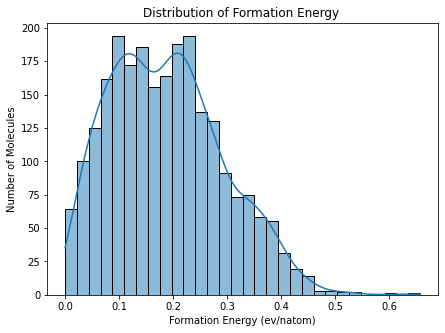

In [20]:
# Formation Energy - How stable is the molecule?

plt.figure(figsize=(7, 5))
ax1 = sns.histplot(df['formation_energy_ev_natom'], bins = 30, kde=True)
ax1.set_title('Distribution of Formation Energy ')
ax1.set_xlabel('Formation Energy (ev/natom)')
ax1.set_ylabel('Number of Molecules')



In [ ]:
# The change in energy when one mole of a substance is formed from its constituent elements in their standard states
# most common "instability" level is around 0.1-0.2 eV/atom ; 0 is stable


Text(0, 0.5, 'Number of Materials')

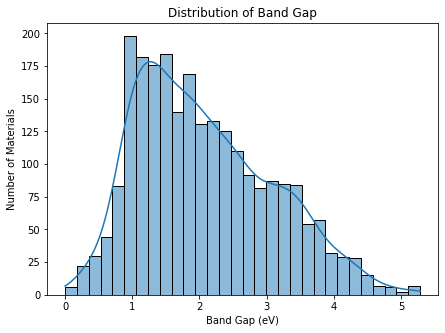

In [24]:
# Band Gap - How transparent is the molecule? Semiconductor Properties?

plt.figure(figsize=(7, 5)) 
ax2 = sns.histplot(df['bandgap_energy_ev'], bins=30, kde=True)
ax2.set_title('Distribution of Band Gap')
ax2.set_xlabel('Band Gap (eV)')
ax2.set_ylabel('Number of Materials')

In [23]:
# Band gap is the energy (in electron-Volts) required to excite an electron, making it conductive.
# Low Band Gap (< 1.5 eV): These are opaque semiconductors (like silicon) or metals, they absorb visible light.
# High Band Gap (> 3.1 eV): These are transparent to visible light because the light's energy isn't high enough to excite the electrons.
# Very High Band Gap (> 4.0 eV): These are typically insulators, which are very hard to make conductive.